In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
def get_mask_imgs(img_path):
    mask_imgs = []
    for img in os.listdir(img_path):
        if img.split('.')[-1] == 'png':
            mask_imgs.append(img_path+"/"+img)
    return mask_imgs

def read_imgs(mask_path):
    mask_imgs = get_mask_imgs(mask_path) 
    # print(mask_imgs)
    masks = []
    for img in mask_imgs:
        mask = cv2.imread(img, 0)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        ret, bw_img = cv2.threshold(mask, 10, 255, cv2.THRESH_BINARY)
        # print(bw_img.shape)
        # plt.imshow(mask)    
        masks.append(bw_img)    
    return masks

In [53]:
USER_IMG = 'img6'

all_mask_paths = "../inputs/masks/{}".format(USER_IMG)

In [65]:
all_masks = read_imgs(all_mask_paths)
print(len(all_masks))

4


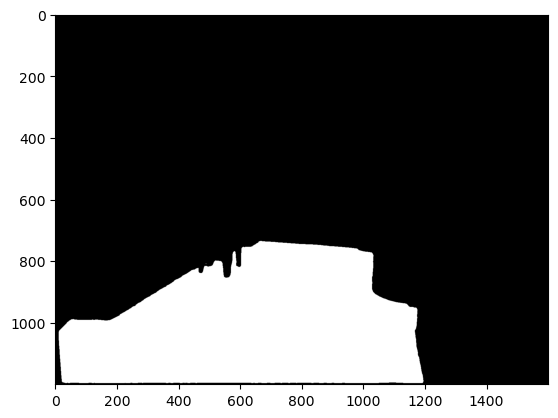

In [66]:
plt.imshow(all_masks[0])

center X : '490'
center Y : '809'


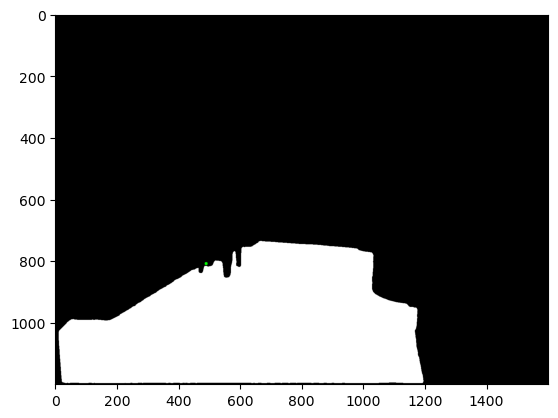

In [67]:
image = all_masks[0]
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply cv2.threshold() to get a binary image
ret, thresh = cv2.threshold(gray_image, 50, 255, cv2.THRESH_BINARY)

# Find contours:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw contours:
image = cv2.drawContours(image, contours, 0, (0, 255, 0), 2)

# Calculate image moments of the detected contour
M = cv2.moments(contours[0])

# Print center (debugging):
print("center X : '{}'".format(round(M['m10'] / M['m00'])))
print("center Y : '{}'".format(round(M['m01'] / M['m00'])))

# Draw a circle based centered at centroid coordinates
cv2.circle(image, (round(M['m10'] / M['m00']), round(M['m01'] / M['m00'])), 5, (0, 255, 0), -1)

# Show image:
plt.imshow(image)


In [69]:
contours[0]

array([[[489, 809]],

       [[490, 810]],

       [[490, 809]]], dtype=int32)